In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('completereview.csv',low_memory=False, index_col=0)
df = df.reset_index(drop=True)

In [3]:
df # social, information, fairness

,id,title,score,lease,rent,condition,responsiveness,respect,information,fairness,...,cached_votes_up,cached_votes_down,cached_weighted_score,cached_weighted_total,cached_weighted_average,deposit,deposit_jusitified,best_thing,worst_thing,complete
0,2374,New management staff is outstanding,4.0,3.0,1999.0,4.0,4.0,4.0,4.0,NaN,...,0,0,0,0,0.0,NaN,NaN,The location,Parking is expensive,True
1,2382,Yes,4.4,4.0,NaN,4.0,4.0,5.0,5.0,NaN,...,0,0,0,0,0.0,NaN,NaN,Responded to questions and maintenance request...,Didn't experience much negativity. They're ver...,True
2,2385,Friendly staff,4.9,4.0,2290.0,5.0,5.0,5.0,5.0,NaN,...,0,0,0,0,0.0,NaN,NaN,High ceilings. I love high ceilings!,None,True
3,7304,Horrible experience. DO NOT RENT FROM THEM.,4.1,1.0,1.0,5.0,3.0,5.0,5.0,NaN,...,0,0,0,0,0.0,100.0,True,NaN,NaN,True
4,2654,Management refuses to handle any problem,1.0,2.0,2750.0,1.0,1.0,1.0,1.0,NaN,...,1,1,0,2,0.0,NaN,NaN,The pool,Management,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15013,17706,Great experience!,5.0,3.0,0.0,5.0,5.0,5.0,5.0,NaN,...,0,0,0,0,0.0,0.0,NaN,NaN,NaN,True
15014,17708,Test titletitle,3.7,1.0,250.0,5.0,5.0,2.0,3.0,NaN,...,0,0,0,0,0.0,0.0,NaN,NaN,NaN,True
15015,17709,Love living here.,4.6,4.0,2300.0,5.0,4.0,5.0,3.0,NaN,...,0,0,0,0,0.0,0.0,NaN,NaN,NaN,True
15016,16680,Slumlord,3.0,1.0,700.0,5.0,2.0,5.0,2.0,NaN,...,0,0,0,0,0.0,0.0,True,NaN,NaN,True


In [4]:
df.columns

Index(['id', 'title', 'score', 'lease', 'rent', 'condition', 'responsiveness',
       'respect', 'information', 'fairness', 'safety', 'landlord_id',
       'recommend', 'created_at', 'updated_at', 'body', 'college_id',
       'visible', 'author_id', 'author_type', 'pests', 'social', 'email',
       'flagged', 'cached_votes_total', 'cached_votes_score',
       'cached_votes_up', 'cached_votes_down', 'cached_weighted_score',
       'cached_weighted_total', 'cached_weighted_average', 'deposit',
       'deposit_jusitified', 'best_thing', 'worst_thing', 'complete'],
      dtype='object')

In [5]:
df = df.drop(columns = ['id','title','landlord_id','updated_at','body','visible','author_type','email','flagged','best_thing','worst_thing','cached_votes_score','cached_votes_up','cached_votes_down','cached_weighted_total','cached_weighted_average','deposit','complete'])

In [6]:
df.columns

Index(['score', 'lease', 'rent', 'condition', 'responsiveness', 'respect',
       'information', 'fairness', 'safety', 'recommend', 'created_at',
       'college_id', 'author_id', 'pests', 'social', 'cached_votes_total',
       'cached_weighted_score', 'deposit_jusitified'],
      dtype='object')

In [7]:
df = df.drop(columns = ['college_id','deposit_jusitified','created_at','cached_votes_total','cached_weighted_score', 'lease','rent'])


In [8]:
df.columns

Index(['score', 'condition', 'responsiveness', 'respect', 'information',
       'fairness', 'safety', 'recommend', 'author_id', 'pests', 'social'],
      dtype='object')

In [9]:
df = df.drop(['author_id'], axis=1)

In [10]:
df = df.drop(['fairness'],axis=1)

In [11]:
df.columns

Index(['score', 'condition', 'responsiveness', 'respect', 'information',
       'safety', 'recommend', 'pests', 'social'],
      dtype='object')

In [12]:
rec_map = {False: 0, True: 1}

df = df.replace({'recommend': rec_map})


In [13]:
df

,score,condition,responsiveness,respect,information,safety,recommend,pests,social
0,4.0,4.0,4.0,4.0,4.0,4.0,1,4.0,4.0
1,4.4,4.0,4.0,5.0,5.0,4.0,1,4.0,5.0
2,4.9,5.0,5.0,5.0,5.0,5.0,1,4.0,5.0
3,4.1,5.0,3.0,5.0,5.0,2.0,0,5.0,4.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
15013,5.0,5.0,5.0,5.0,5.0,5.0,1,5.0,5.0
15014,3.7,5.0,5.0,2.0,3.0,5.0,1,1.0,5.0
15015,4.6,5.0,4.0,5.0,3.0,5.0,1,5.0,5.0
15016,3.0,5.0,2.0,5.0,2.0,1.0,0,1.0,5.0


In [14]:
df = sklearn.utils.shuffle(df)
X = df.drop(['recommend'], axis=1)
y = df['recommend']

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
X.shape

(15018, 8)

In [17]:
y = np.array(y)

In [18]:
y

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=32, test_size=0.2)

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
X_train.shape

(12014, 8)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),
             loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
m = model.fit(X_train, y_train, validation_split=0.15, epochs=60, batch_size=62)

Epoch 1/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.6916 - val_loss: 0.5448 - val_accuracy: 0.7194
Epoch 2/100
165/165 [==============================] - 0s 720us/step - loss: 0.5269 - accuracy: 0.7405 - val_loss: 0.5096 - val_accuracy: 0.7415
Epoch 3/100
165/165 [==============================] - 0s 714us/step - loss: 0.5090 - accuracy: 0.7521 - val_loss: 0.4986 - val_accuracy: 0.7526
Epoch 4/100
165/165 [==============================] - 0s 702us/step - loss: 0.5000 - accuracy: 0.7574 - val_loss: 0.4922 - val_accuracy: 0.7571
Epoch 5/100
165/165 [==============================] - 0s 722us/step - loss: 0.4942 - accuracy: 0.7611 - val_loss: 0.4860 - val_accuracy: 0.7659
Epoch 6/100
165/165 [==============================] - 0s 774us/step - loss: 0.4897 - accuracy: 0.7651 - val_loss: 0.4816 - val_accuracy: 0.7682
Epoch 7/100
165/165 [==============================] - 0s 683us/step - loss: 0.4859 - accuracy: 0.7679 - val_loss: 0.4782 - val_accu

In [26]:
print('test score:',model.evaluate(X_test, y_test))

94/94 [==============================] - 0s 668us/step - loss: 0.4734 - accuracy: 0.7866
test score: [0.473352313041687, 0.7866178154945374]


In [38]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

In [43]:
print(y_pred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [False]]


In [39]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [1 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1114  361]
 [ 280 1249]]


0.7866178428761651

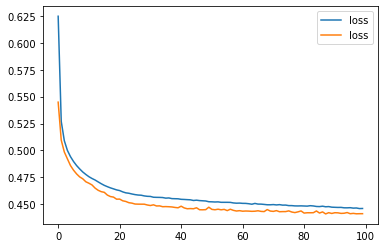

In [36]:
plt.plot(m.history['loss'], label='loss')
plt.plot(m.history['val_loss'],label='loss')
plt.legend()

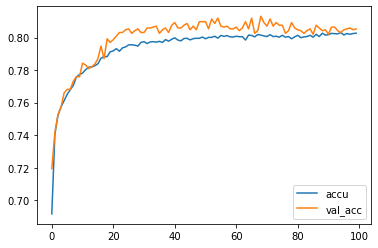

In [37]:
plt.plot(m.history['accuracy'],label='accu')
plt.plot(m.history['val_accuracy'], label='val_acc')
plt.legend()

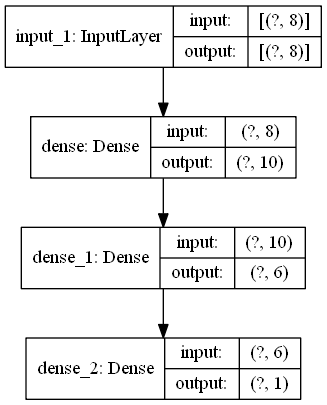

In [42]:
from keras.utils import plot_model

tf.keras.utils.plot_model(model, to_file='tesnor3.png', show_shapes=True, show_layer_names=True)
